# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#print(cities[-1])
# print(city)
url = "http://api.openweathermap.org/data/2.5/weather?"
city_q= "henties bay"
unit= "imperial"
query_url= f"{url}q={city_q}&units={unit}&appid={weather_api_key}"
response= requests.get(query_url).json()
print(response)
# print(response['main']['temp'])
# print(response['main']['humidity'])
# print(response['wind']['speed'])
# print(response['clouds']['all'])
# print(response['id'])

{'coord': {'lon': 14.2845, 'lat': -22.116}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 64, 'feels_like': 66.54, 'temp_min': 64, 'temp_max': 64, 'pressure': 1011, 'humidity': 90}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 284, 'gust': 3}, 'clouds': {'all': 0}, 'dt': 1612658544, 'sys': {'type': 3, 'id': 2012545, 'country': 'NA', 'sunrise': 1612673271, 'sunset': 1612719973}, 'timezone': 7200, 'id': 3356832, 'name': 'Henties Bay', 'cod': 200}


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
unit= "imperial"
city_name= []
city_id= []
temp= []
humidity= []
wind= []
cloudiness= []
latitude= []
longitude= []
country= []
counter = 0
set_v= 1
for city in cities:
    try:
        query_url= f"{url}&q={city}&units={unit}&appid={weather_api_key}"
        response= requests.get(query_url).json()
        city_name_v= response['name']
        city_name.append(city_name_v)
        city_id_v= response['id']
        city_id.append(city_id_v)
        temp_v=response['main']['temp_max']
        temp.append(temp_v)
        humidity_v= response['main']['humidity']
        humidity.append(humidity_v)
        wind_v= response['wind']['speed']
        wind.append(wind_v)
        cloudiness_v= response['clouds']['all']
        cloudiness.append(cloudiness_v)
        latitude_v= response['coord']['lat']
        latitude.append(latitude_v)
        longitude_v= response['coord']['lon']
        longitude.append(longitude_v)
        country_v= response['sys']['country']
        country.append(country_v)
        counter= counter +1
        print(f"Recording Record of {counter} of Set {set_v}: {city_name_v} ")
        if counter == 51:
            set_v= set_v+1
            counter= 0
            
    except:
        print("City not found. Skipping...")
# print(humidity)
# print(temp)
# print(wind)
# print(cloudiness)

Recording Record of 1 of Set 1: Muisne 
Recording Record of 2 of Set 1: Acheng 
Recording Record of 3 of Set 1: Punta Arenas 
Recording Record of 4 of Set 1: Lavrentiya 
City not found. Skipping...
Recording Record of 5 of Set 1: Sørland 
Recording Record of 6 of Set 1: Barrow 
Recording Record of 7 of Set 1: Santiago 
Recording Record of 8 of Set 1: Gwadar 
Recording Record of 9 of Set 1: Rikitea 
Recording Record of 10 of Set 1: Pathein 
Recording Record of 11 of Set 1: Coquimbo 
Recording Record of 12 of Set 1: Gari 
Recording Record of 13 of Set 1: Bluff 
Recording Record of 14 of Set 1: Adrar 
Recording Record of 15 of Set 1: Salalah 
Recording Record of 16 of Set 1: Erdenet 
City not found. Skipping...
Recording Record of 17 of Set 1: Hobart 
Recording Record of 18 of Set 1: Pangai 
Recording Record of 19 of Set 1: Binga 
Recording Record of 20 of Set 1: Butaritari 
Recording Record of 21 of Set 1: Kumul 
Recording Record of 22 of Set 1: Khatanga 
Recording Record of 23 of Set 1:

Recording Record of 29 of Set 4: Arraial do Cabo 
Recording Record of 30 of Set 4: Teya 
Recording Record of 31 of Set 4: Paamiut 
Recording Record of 32 of Set 4: Hong Kong 
Recording Record of 33 of Set 4: Clyde River 
City not found. Skipping...
Recording Record of 34 of Set 4: Carnarvon 
Recording Record of 35 of Set 4: Shiroishi 
Recording Record of 36 of Set 4: Moose Factory 
Recording Record of 37 of Set 4: Zhigalovo 
Recording Record of 38 of Set 4: Kandi 
Recording Record of 39 of Set 4: Inhambane 
Recording Record of 40 of Set 4: Thunder Bay 
Recording Record of 41 of Set 4: Kruisfontein 
Recording Record of 42 of Set 4: Dingle 
Recording Record of 43 of Set 4: Igarka 
Recording Record of 44 of Set 4: Anagé 
Recording Record of 45 of Set 4: Vestmannaeyjar 
Recording Record of 46 of Set 4: Bengkulu 
City not found. Skipping...
Recording Record of 47 of Set 4: Raudeberg 
Recording Record of 48 of Set 4: George Town 
Recording Record of 49 of Set 4: Nouadhibou 
Recording Record 

Recording Record of 51 of Set 7: Mackay 
Recording Record of 1 of Set 8: Izhmorskiy 
Recording Record of 2 of Set 8: Caborca 
City not found. Skipping...
Recording Record of 3 of Set 8: Pangody 
City not found. Skipping...
Recording Record of 4 of Set 8: Socorro 
Recording Record of 5 of Set 8: Itoman 
Recording Record of 6 of Set 8: Kindu 
Recording Record of 7 of Set 8: Archidona 
Recording Record of 8 of Set 8: Ostrovnoy 
Recording Record of 9 of Set 8: Eydhafushi 
Recording Record of 10 of Set 8: Yerbogachën 
Recording Record of 11 of Set 8: Hamilton 
Recording Record of 12 of Set 8: Grand Gaube 
Recording Record of 13 of Set 8: Hervey Bay 
Recording Record of 14 of Set 8: Abu Dhabi 
Recording Record of 15 of Set 8: Iquitos 
Recording Record of 16 of Set 8: Sturgis 
Recording Record of 17 of Set 8: Weinan 
Recording Record of 18 of Set 8: Nome 
Recording Record of 19 of Set 8: Merauke 
Recording Record of 20 of Set 8: Las Cruces 
Recording Record of 21 of Set 8: Kovernino 
Recordin

Recording Record of 26 of Set 11: Pasaje 
Recording Record of 27 of Set 11: Zhuhai 
Recording Record of 28 of Set 11: Huarmey 
Recording Record of 29 of Set 11: Hofn 
Recording Record of 30 of Set 11: Ribas do Rio Pardo 
Recording Record of 31 of Set 11: Longyearbyen 
Recording Record of 32 of Set 11: Alofi 
Recording Record of 33 of Set 11: Harper 
Recording Record of 34 of Set 11: Bereda 
Recording Record of 35 of Set 11: Cockburn Town 
Recording Record of 36 of Set 11: Waingapu 
Recording Record of 37 of Set 11: Weligama 
City not found. Skipping...
Recording Record of 38 of Set 11: Krasnaya Gorka 
Recording Record of 39 of Set 11: Ilhéus 
Recording Record of 40 of Set 11: Oranjestad 
Recording Record of 41 of Set 11: Ambulu 
Recording Record of 42 of Set 11: Paide 
Recording Record of 43 of Set 11: Dongsheng 
Recording Record of 44 of Set 11: Samaná 
Recording Record of 45 of Set 11: Mahon 
Recording Record of 46 of Set 11: Makkah al Mukarramah 
Recording Record of 47 of Set 11: Ma

In [6]:
weather_df= pd.DataFrame({"City Name" : city_name})
weather_df["City ID"]= city_id
weather_df["Latitude"]= latitude
weather_df["Longitude"]= longitude
#alt + 0176 is degree symbol
weather_df["Temp °F"]= temp
weather_df["Humidity %"]= humidity
weather_df["Wind Speed (mph)"]= wind
weather_df["Cloudiness %"]= cloudiness
weather_df["Country"]= country
weather_df
   


,City Name,City ID,Latitude,Longitude,Temp °F,Humidity %,Wind Speed (mph),Cloudiness %,Country
0,Muisne,3653967,0.6000,-80.0333,78.57,86,4.03,97,EC
1,Acheng,2038679,45.5454,126.9770,-7.60,84,6.71,100,CN
2,Punta Arenas,3874787,-53.1500,-70.9167,53.60,62,18.41,0,CL
3,Lavrentiya,4031637,65.5833,-171.0000,-9.15,79,0.63,0,RU
4,Sørland,3137469,67.6670,12.6934,35.22,79,19.93,8,NO
...,...,...,...,...,...,...,...,...,...
566,Qinzhou,1797551,21.9500,108.6167,67.86,76,5.86,1,CN
567,Luxor,360502,25.6989,32.6421,53.02,73,2.42,0,EG
568,Syracuse,2523082,37.0881,15.2792,51.80,100,6.91,90,IT
569,George,1002145,-33.9630,22.4617,66.20,94,8.05,75,ZA


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df.to_csv("Weather_df.csv",index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
impossible=weather_df.loc[weather_df["Humidity %"] > 100]
impossible



,City Name,City ID,Latitude,Longitude,Temp °F,Humidity %,Wind Speed (mph),Cloudiness %,Country


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

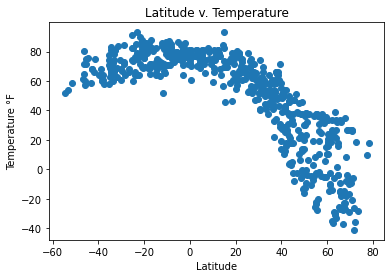

In [9]:
plt.scatter(weather_df['Latitude'],weather_df['Temp °F'])
plt.xlabel("Latitude")
plt.ylabel("Temperature °F")
plt.title("Latitude v. Temperature")
plt.show()

- The above graph shows that as you get to the more polar ends (-60, 80), temperature has more drastic extremes, often towards the cooler ends. Additionally, there are more cities in the sample that are closer to the north pole (Russia, Scandavia, etc) hence the negative temperatures. 

## Latitude vs. Humidity Plot

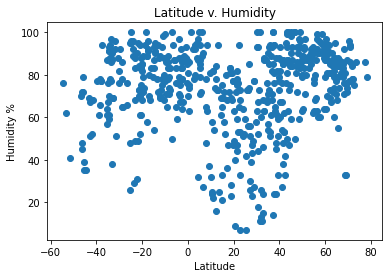

In [10]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity %"])
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Latitude v. Humidity")
plt.show()

- There is no overall trend in Humidity with latitude, however there are clusters of note. The cluster between (-20,40) has a large portion of the lower humidities. In my sample of cities, there were a number of South American cities and Saharan Africa, perhaps skewing these latitudes towards non-humid results. 
-There is another cluster of note in the (60,80) range. Perhaps cities in these extreme northern areas are all situated close to the sea, causing higher humidity. 

## Latitude vs. Cloudiness Plot

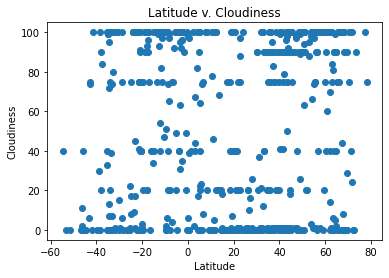

In [11]:
plt.scatter(weather_df["Latitude"],weather_df['Cloudiness %'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude v. Cloudiness")
plt.show()

- Cloudiness is determined by the wind, as it flows between latitudes, it moves laterally along certain belts. You can see this around the world as evidenced in the clusters of lines across all latitudes. 

## Latitude vs. Wind Speed Plot

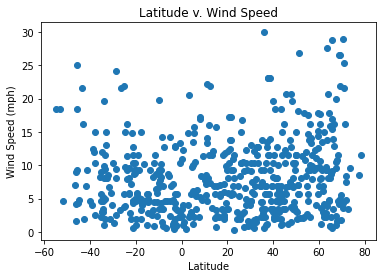

In [12]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed (mph)"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude v. Wind Speed")
plt.show()

- Wind speed is more intense at the polar ends of the Earth, due to the rotation of the Earth. Average wind speed is less than 15 mph for most latitudes until you get to the more extreme latitudes. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

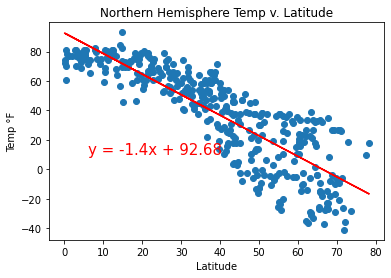

In [13]:
x_check= weather_df.loc[weather_df["Latitude"] > 0]
# print(x_check)
x_values= x_check['Latitude']
y_values= x_check['Temp °F']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temp °F")
plt.title("Northern Hemisphere Temp v. Latitude")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

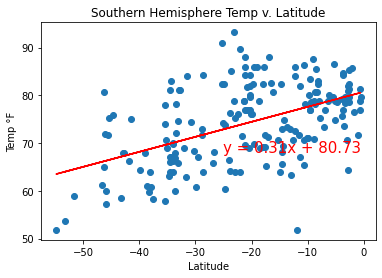

In [14]:
x_check= weather_df.loc[weather_df["Latitude"] < 0]
# print(x_check)
x_values= x_check['Latitude']
y_values= x_check['Temp °F']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,68),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temp °F")
plt.title("Southern Hemisphere Temp v. Latitude")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

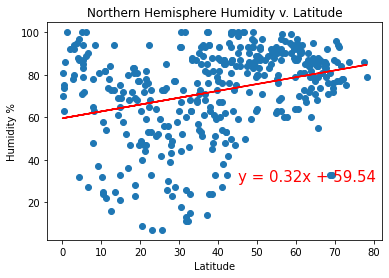

In [15]:
x_check= weather_df.loc[weather_df["Latitude"] > 0]
x_values= x_check['Latitude']
y_values= x_check['Humidity %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Northern Hemisphere Humidity v. Latitude")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

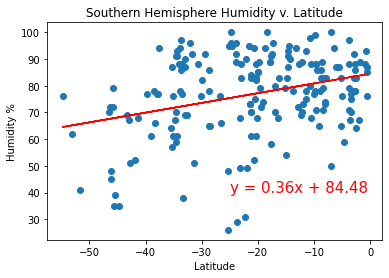

In [16]:
x_check= weather_df.loc[weather_df["Latitude"] < 0]
# print(x_check)
x_values= x_check['Latitude']
y_values= x_check['Humidity %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Southern Hemisphere Humidity v. Latitude")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

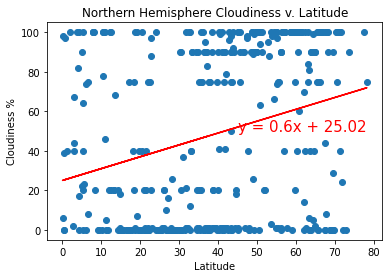

In [17]:
x_check= weather_df.loc[weather_df["Latitude"] > 0]
x_values= x_check['Latitude']
y_values= x_check['Cloudiness %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("Northern Hemisphere Cloudiness v. Latitude")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

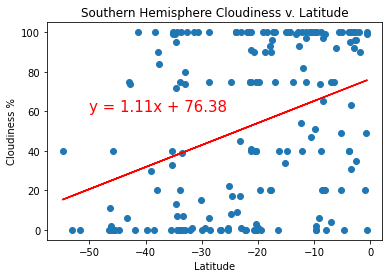

In [23]:
x_check= weather_df.loc[weather_df["Latitude"] < 0]
# print(x_check)
x_values= x_check['Latitude']
y_values= x_check['Cloudiness %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("Southern Hemisphere Cloudiness v. Latitude")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

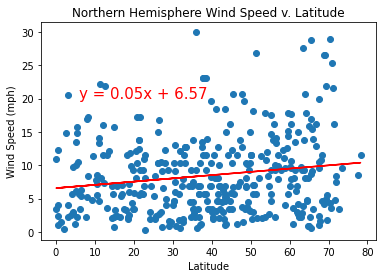

In [22]:
x_check= weather_df.loc[weather_df["Latitude"] > 0]
x_values= x_check['Latitude']
y_values= x_check['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere Wind Speed v. Latitude")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

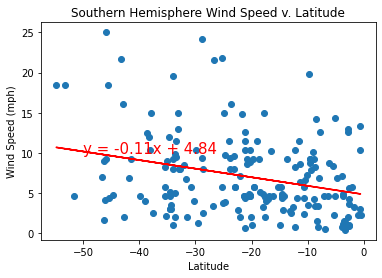

In [21]:
x_check= weather_df.loc[weather_df["Latitude"] < 0]
# print(x_check)
x_values= x_check['Latitude']
y_values= x_check['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere Wind Speed v. Latitude")
plt.show()